In [1]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Legg til src-mappen i sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

from data_rens import DataRens
from statistiske_maal import Statistiske_maal
from data_manipulering import DataManipulering

# Temperatur:

* Oppretter et objekt av klassen DataRens og DataManipulering
* Bruker metodene for å opprette en dataframe og manipulere feil i denne

In [2]:
# Oppretter filstien til JSONfil med nedbør
temp_fil = "../data/frost_temp.json"

# Oppretter et nedbørs-objekt i DataRens()
rens_temp = DataRens()
manip_temp = DataManipulering()


# Lager DataFrame av en JSON
df = rens_temp.fra_json_til_dataframe(temp_fil)


### Manipulerer dataen:
df_fjern_verdi = manip_temp.fjern_verdi_for_tilfeldig_aar(df)
df_legg_til_duplikater = manip_temp.legg_til_duplikater_for_tilfeldig_aar(df_fjern_verdi)


#Viser den manipulerte dataframen:
display(df_legg_til_duplikater.head())



Fjern verdi for år 1997 (rad: 17)
Legger til duplikat for år 1980.
Totalt antall rader etter duplisering: 42.


,sourceId,referenceTime,elementId,value,unit,timeOffset,performanceCategory,year
41,SN18700:0,1980-01-01 00:00:00+00:00,best_estimate_mean(air_temperature P1Y),5.4,degC,PT0H,C,1980
40,SN18700:0,1980-01-01 00:00:00+00:00,best_estimate_mean(air_temperature P1Y),5.4,degC,PT0H,C,1980
0,SN18700:0,1981-01-01 00:00:00+00:00,best_estimate_mean(air_temperature P1Y),5.2,degC,PT0H,C,1981
1,SN18700:0,1982-01-01 00:00:00+00:00,best_estimate_mean(air_temperature P1Y),6.2,degC,PT0H,C,1982
2,SN18700:0,1983-01-01 00:00:00+00:00,best_estimate_mean(air_temperature P1Y),NaN,degC,PT0H,C,1983


# Datarens av temperatur
- Bruker metode fra DataRens for å rense dataframen

In [3]:
# Bruke metode for å rense Dataframen
df_temp_renset = rens_temp.rens_DataFrame(df_legg_til_duplikater)

# Printer ut renset dataframe av nedbør
display("Ferdig renset dataframe: ", df_temp_renset.head())


Antall duplikater funnet: 1
Duplikater er fjernet - antall rader:  41
Antall år med manglende verdi: 1
Rader uten verdi:
 year  value unit
 1997    NaN degC
Manglende verdier er erstattet med gjennomsnittet:  6.73


'Ferdig renset dataframe: '

,year,value,unit
41,1980,5.40,degC
0,1981,5.20,degC
1,1982,6.20,degC
2,1983,6.74,degC
3,1984,6.70,degC


# Beregning av statistiske mål:
*Beregninger*: <br>
Beregningene gjøres i 4 intervaller: <br>
1980-1989 <br>
1990-1999 <br>
2000-2009 <br>
2010-2020 <br>

Samt en beregning for hele intervallet i sin helhet (1980-2020)

**Beregning av gjennomsnitt**


In [4]:
temp_mål = Statistiske_maal()

gjennomsnitt_temp = temp_mål.gjennomsnitt(df_temp_renset)

print("Gjennomsnitt i 4 intervaller + totalt: ")
for key, value in gjennomsnitt_temp.items():
    print(f"{key}: {value} °C")


Gjennomsnitt i 4 intervaller + totalt: 
1980-1989: 5.93 °C
1990-1999: 6.56 °C
2000-2009: 7.17 °C
2010-2020: 7.22 °C
Totalt: 6.74 °C


**Beregning av median**

In [5]:
median_temp = temp_mål.median(df_temp_renset)

print("Median i 4 intervaller + totalt: ")
for key, value in median_temp.items():
    print(f"{key}: {value} °C")

Median i 4 intervaller + totalt: 
1980-1989: 5.85 °C
1990-1999: 6.55 °C
2000-2009: 7.19 °C
2010-2020: 7.3 °C
Totalt: 6.8 °C


**Beregning av standardavvik**

In [6]:
standardavvik_temp = temp_mål.standardavvik(df_temp_renset)

print("Standardavvik i 4 intervaller + totalt: ")
for key, value in standardavvik_temp.items():
    print(f"{key}: {value} °C")

Standardavvik i 4 intervaller + totalt: 
1980-1989: 1.08 °C
1990-1999: 0.65 °C
2000-2009: 0.48 °C
2010-2020: 1.01 °C
Totalt: 0.98 °C


# Visualisering

In [ ]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

from visualisering import vis_statistikk
from visualisering import visualiser_statistikk_per_tiår


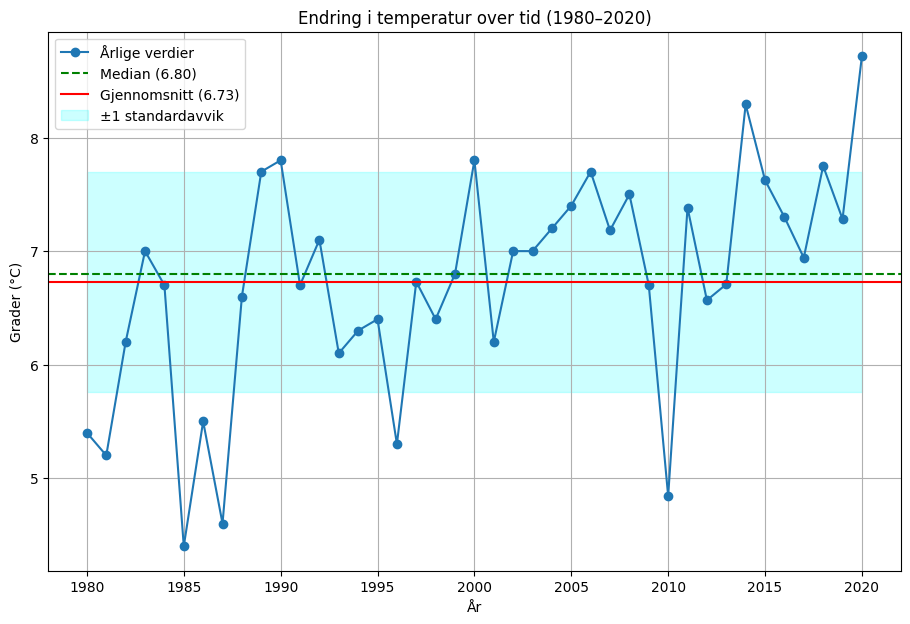

In [8]:
vis_statistikk(
    df_temp_renset["year"],
    df_temp_renset["value"],
    median=median_temp["Totalt"],
    gjennomsnitt=gjennomsnitt_temp["Totalt"],
    std=standardavvik_temp["Totalt"],
    tittel="Endring i temperatur over tid (1980–2020)",
    y_label="Grader (°C)"
)


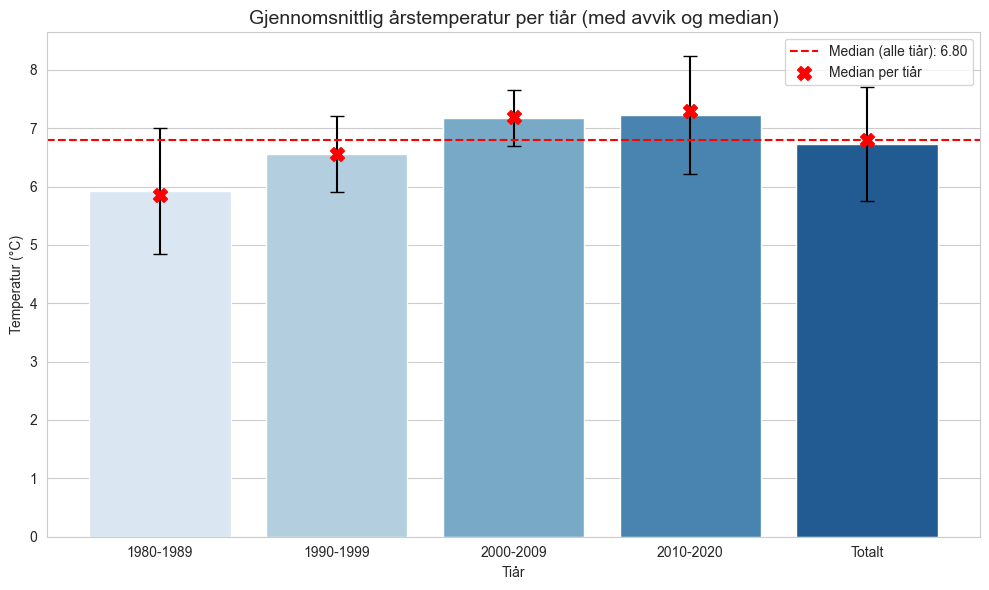

In [9]:
visualiser_statistikk_per_tiår(
    gjennomsnitt=gjennomsnitt_temp,
    median=median_temp,
    standardavvik=standardavvik_temp,
    tittel="Gjennomsnittlig årstemperatur per tiår (med avvik og median)",
    ylabel="Temperatur (°C)"
)


# Lagrer viktige variabler i med %store for å bruke videre

In [10]:
# lager variablene for en samlet visualisering

%store df_temp_renset
%store gjennomsnitt_temp
%store standardavvik_temp
%store median_temp

Stored 'df_temp_renset' (DataFrame)
Stored 'gjennomsnitt_temp' (dict)
Stored 'standardavvik_temp' (dict)
Stored 'median_temp' (dict)


# Prediktiv analyse

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

1. grads modell:
  
0.0453 x - 83.87 

2. grads modell:
             2
-0.0003773 x + 1.555 x - 1593 

3. grads modell:
            3          2
0.0001261 x - 0.7571 x + 1515 x - 1.011e+06


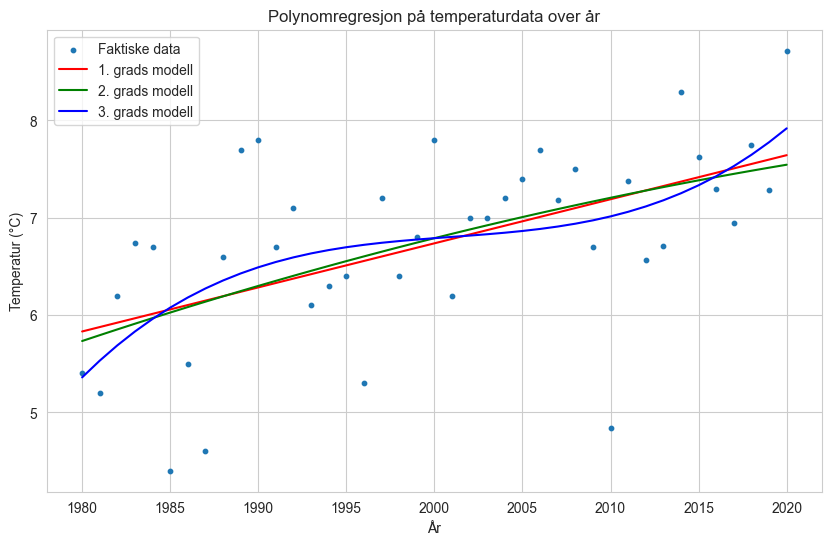

In [59]:

# Bruk faktiske årstall som X
X = df_temp_renset['year'].values
y = df_temp_renset['value'].values

# Funksjon for å lage modeller
def create_model(X, y, deg):
    polynom_deg = np.polyfit(X, y, deg=deg)
    my_model = np.poly1d(polynom_deg)
    return my_model

# Lag modeller
model_1 = create_model(X, y, 1)
model_2 = create_model(X, y, 2)
model_3 = create_model(X, y, 3)

# Print modellene
print("1. grads modell:\n", model_1, "\n")
print("2. grads modell:\n", model_2, "\n")
print("3. grads modell:\n", model_3)

# Sorter X for jevn graf
X_sorted = np.sort(X)
y_1 = model_1(X_sorted)
y_2 = model_2(X_sorted)
y_3 = model_3(X_sorted)

# Plotting av modellene
plt.figure(figsize=(10,6))
plt.scatter(X, y, s=10, label="Faktiske data")
plt.plot(X_sorted, y_1, color='red', label='1. grads modell')
plt.plot(X_sorted, y_2, color='green', label='2. grads modell')
plt.plot(X_sorted, y_3, color='blue', label='3. grads modell')
plt.xlabel("År")
plt.ylabel("Temperatur (°C)")
plt.title("Polynomregresjon på temperaturdata over år")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Beregning av R²-score for å se hvilken modell som passer best
r2_1 = r2_score(y, model_1(X))
r2_2 = r2_score(y, model_2(X))
r2_3 = r2_score(y, model_3(X))

# Printer for å se hvilken som er nærmest 1
print(f"R²-score for 1. grads modell: {r2_1:.4f}")
print(f"R²-score for 2. grads modell: {r2_2:.4f}")
print(f"R²-score for 3. grads modell: {r2_3:.4f}")

R²-score for 1. grads modell: 0.3093
R²-score for 2. grads modell: 0.3117
R²-score for 3. grads modell: 0.3405


**Selv om R²-scoren for 3. gradsmodellen gir er høyere resultat (nærmere 0), så er det ikke mye variasjon mellom de tre modellene. 3. gradsmodellen ga oss en veldig urealistisk, og alt for høy, fremtidig verdi i 2040 på 15°C. Vi velger derfor å gå videre med 1. gradsmodellen, som er en enklere, og samtidig mer realistisk prediksjon av gjennomsnittlig temperatur.**

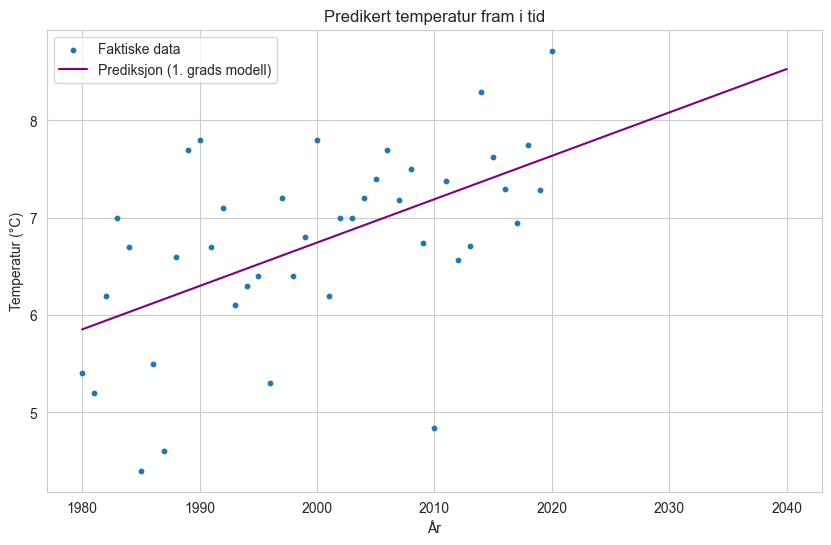

In [15]:
# Prediksjon
test_X = np.linspace(X.min(), 2040)
y_predict = model_1(test_X)

# Plotting med prediksjon
plt.figure(figsize=(10,6))
plt.scatter(X, y, label='Faktiske data', s=10)
plt.plot(test_X, y_predict, color='purple', label='Prediksjon (1. grads modell)')
plt.xlabel("År")
plt.ylabel("Temperatur (°C)")
plt.title("Predikert temperatur fram i tid")
plt.legend()
plt.grid(True)
plt.show()